# Description

Generates the figure for top cell types for a specified LV (in Settings section below).

# Modules loading

In [1]:
import re
from pathlib import Path

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from data.recount2 import LVAnalysis
from utils import chunker
import conf

# Settings

In [2]:
LV_NAME = "LV696"

In [3]:
LV_AXIS_THRESHOLD = None  # 3.0
# LV_AXIS_THRESHOLD = 2.0
N_TOP_SAMPLES = 400
N_TOP_ATTRS = 15

In [4]:
# OUTPUT_FIGURES_DIR = Path(
#     conf.MANUSCRIPT["FIGURES_DIR"], "lvs_analysis", f"{LV_NAME.lower()}"
# ).resolve()
# display(OUTPUT_FIGURES_DIR)
# OUTPUT_FIGURES_DIR.mkdir(parents=True, exist_ok=True)

In [5]:
# OUTPUT_CELL_TYPE_FILEPATH = OUTPUT_FIGURES_DIR / f"{LV_NAME.lower()}-cell_types.svg"
# display(OUTPUT_CELL_TYPE_FILEPATH)

# Load MultiPLIER summary

In [6]:
multiplier_model_summary = pd.read_pickle(conf.MULTIPLIER["MODEL_SUMMARY_FILE"])

In [7]:
multiplier_model_summary.shape

(2157, 5)

In [8]:
multiplier_model_summary.head()

,pathway,LV index,AUC,p-value,FDR
1,KEGG_LYSINE_DEGRADATION,1,0.388059,0.866078,0.956005
2,REACTOME_MRNA_SPLICING,1,0.733057,0.000048,0.000582
3,MIPS_NOP56P_ASSOCIATED_PRE_RRNA_COMPLEX,1,0.680555,0.001628,0.011366
4,KEGG_DNA_REPLICATION,1,0.549473,0.312155,0.539951
5,PID_MYC_ACTIVPATHWAY,1,0.639303,0.021702,0.083739


# Load data

## Original data

In [9]:
# INPUT_SUBSET = "z_score_std"

In [10]:
# INPUT_STEM = "projection-smultixcan-efo_partial-mashr-zscores"

In [11]:
# input_filepath = Path(
#     conf.RESULTS["DATA_TRANSFORMATIONS_DIR"],
#     INPUT_SUBSET,
#     f"{INPUT_SUBSET}-{INPUT_STEM}.pkl",
# ).resolve()
# display(input_filepath)

# assert input_filepath.exists(), "Input file does not exist"

# input_filepath_stem = input_filepath.stem
# display(input_filepath_stem)

In [12]:
# data = pd.read_pickle(input_filepath)

In [13]:
# data.shape

In [14]:
# data.head()

## LV data

In [15]:
# lv_obj = LVAnalysis(LV_NAME, data)
lv_obj = LVAnalysis(LV_NAME)

In [16]:
multiplier_model_summary[
    multiplier_model_summary["LV index"].isin((LV_NAME[2:],))
    & (
        (multiplier_model_summary["FDR"] < 0.05)
        | (multiplier_model_summary["AUC"] >= 0.75)
    )
]

,pathway,LV index,AUC,p-value,FDR


In [17]:
lv_data = lv_obj.get_experiments_data()

SRP055569, SRP060416, SRP042161, SRP066834, SRP033135, SRP012461, SRP064464, SRP059379, SRP057196, SRP042620, SRP009266, SRP058773, SRP049500, SRP011578, SRP015449, SRP029889, SRP050499, SRP058667, SRP005177, SRP013935, SRP055810, SRP047192, SRP045659, SRP063840, SRP019241, SRP004042, SRP009862, SRP058120, SRP058822, SRP055153, SRP059775, SRP049238, SRP028902, SRP007359, SRP002915, SRP055513, SRP018838, SRP055512, SRP025982, SRP050892, SRP007461, 

/opt/code/libs/data/recount2.py:360: UserWarning: Not all experiments data could be loaded (38 != 41)
  warnings.warn(


In [18]:
lv_data.shape

(7655, 67)

In [19]:
lv_data.head()

cell type tonsil donor  \
project   run                                                         
SRP055569 SRR1821717  MCF10a human breast cancer cells          NaN   
          SRR1821716  MCF10a human breast cancer cells          NaN   
          SRR1821715  MCF10a human breast cancer cells          NaN   
          SRR1821714  MCF10a human breast cancer cells          NaN   
          SRR1821713  MCF10a human breast cancer cells          NaN   

                     facs gating cell line patient id subtype Stage tissue  \
project   run                                                                
SRP055569 SRR1821717         NaN       NaN        NaN     NaN   NaN    NaN   
          SRR1821716         NaN       NaN        NaN     NaN   NaN    NaN   
          SRR1821715         NaN       NaN        NaN     NaN   NaN    NaN   
          SRR1821714         NaN       NaN        NaN     NaN   NaN    NaN   
          SRR1821713         NaN       NaN        NaN     NaN   NaN    NaN   

                     hour post serum-switch debris  ... labexpid individual  \
project   run                                       ...                       
SRP055569 SRR1821717                    NaN    NaN  ...      NaN        NaN   
          SRR1821716                    NaN    NaN  ...      NaN        NaN   
          SRR1821715                    NaN    NaN  ...      NaN        NaN   
          SRR1821714                    NaN    NaN  ...      NaN        NaN   
          SRR1821713                    NaN    NaN  ...      NaN        NaN   

                     seqc sample platform site library id lane flowcell  \
project   run                                                             
SRP055569 SRR1821717         NaN      NaN  NaN        NaN  NaN      NaN   
          SRR1821716         NaN      NaN  NaN        NaN  NaN      NaN   
          SRR1821715         NaN      NaN  NaN        NaN  NaN      NaN   
          SRR1821714         NaN      NaN  NaN        NaN  NaN      NaN   
          SRR1821713         NaN      NaN  NaN        NaN  NaN      NaN   

                     screening chemicals     LV696  
project   run                                       
SRP055569 SRR1821717                 NaN  0.012764  
          SRR1821716                 NaN -0.004790  
          SRR1821715                 NaN  0.076580  
          SRR1821714                 NaN  0.058092  
          SRR1821713                 NaN  0.041695  

[5 rows x 67 columns]

# LV cell types analysis

## Get top attributes

In [20]:
lv_attrs = lv_obj.get_attributes_variation_score()
display(lv_attrs.head(20))

cell type                 0.014171
knockdown                 0.009733
genotype                  0.008901
facs gating               0.003825
tonsil donor              0.003825
shRNA treatment           0.003225
infection                 0.003225
iPSc                      0.002994
reprogramming vector      0.002994
time                      0.002875
assigned cell type        0.002608
qc pass                   0.002608
cell count                0.002608
ercc_mix                  0.002608
ercc_dilution             0.002608
patient id                0.001891
day of differentiation    0.001816
normal/tumor              0.001816
age                       0.001812
experiment_sample_name    0.001767
dtype: float64

In [21]:
# show those with cell type or tissue in their name
_tmp = pd.Series(lv_attrs.index)
lv_attrs[
    _tmp.str.match(
        "(?:cell.+type$)|(?:tissue$)|(?:tissue.+type$)",
        case=False,
        flags=re.IGNORECASE,
    ).values
].sort_values(ascending=False)

cell type         0.014171
tissue            0.001397
tissue type       0.000547
tissue subtype    0.000547
cell line/type    0.000373
dtype: float64

In [22]:
_tmp = lv_data.loc[
    :,
    [
        "cell type",
        "tissue",
        "tissue subtype",
        "tissue type",
        LV_NAME,
    ],
]

In [23]:
_tmp_seq = list(chunker(_tmp.sort_values(LV_NAME, ascending=False), 25))

In [26]:
_tmp_seq[1]

cell type  \
project   run                                                             
SRP055569 SRR2018995                             U87 human glioma cells   
SRP033135 SRR1033244             Human Skeletal Muscle Myoblasts (HSMM)   
SRP055569 SRR1821378                             U87 human glioma cells   
SRP042161 SRR1294524                                       Glioblastoma   
SRP055569 SRR1821608  mixture of U87 human glioma cells and MCF10a h...   
          SRR2019214  mixture of U87 human glioma cells and WI-38 hu...   
          SRR2019075                  WI-38 human lung fibroblast cells   
SRP064464 SRR2558140                                                NaN   
SRP055569 SRR1821474  mixture of U87 human glioma cells and MCF10a h...   
          SRR2019111  mixture of U87 human glioma cells and WI-38 hu...   
SRP060416 SRR2088267                       tonsil Innate lymphoid cells   
          SRR2088284                       tonsil Innate lymphoid cells   
          SRR2088398                       tonsil Innate lymphoid cells   
SRP055569 SRR1821709                   MCF10a human breast cancer cells   
          SRR2019017                             U87 human glioma cells   
          SRR1821650                   MCF10a human breast cancer cells   
SRP033135 SRR1032955             Human Skeletal Muscle Myoblasts (HSMM)   
SRP055569 SRR2019049                             U87 human glioma cells   
SRP060416 SRR2088496                       tonsil Innate lymphoid cells   
SRP042161 SRR1295049                                       Glioblastoma   
SRP066834 SRR2967666                                                NaN   
SRP042161 SRR1295255                             Gliomasphere Cell Line   
          SRR1295166                             Gliomasphere Cell Line   
SRP055569 SRR1821588  mixture of U87 human glioma cells and MCF10a h...   
SRP060416 SRR2088223                       tonsil Innate lymphoid cells   

                               tissue tissue subtype tissue type     LV696  
project   run                                                               
SRP055569 SRR2018995              NaN            NaN         NaN  0.263438  
SRP033135 SRR1033244              NaN            NaN         NaN  0.257249  
SRP055569 SRR1821378              NaN            NaN         NaN  0.252428  
SRP042161 SRR1294524              NaN            NaN         NaN  0.247416  
SRP055569 SRR1821608              NaN            NaN         NaN  0.246148  
          SRR2019214              NaN            NaN         NaN  0.236064  
          SRR2019075              NaN            NaN         NaN  0.232754  
SRP064464 SRR2558140              NaN            NaN         NaN  0.229892  
SRP055569 SRR1821474              NaN            NaN         NaN  0.220897  
          SRR2019111              NaN            NaN         NaN  0.217266  
SRP060416 SRR2088267              NaN            NaN         NaN  0.214260  
          SRR2088284              NaN            NaN         NaN  0.206559  
          SRR2088398              NaN            NaN         NaN  0.206400  
SRP055569 SRR1821709              NaN            NaN         NaN  0.195753  
          SRR2019017              NaN            NaN         NaN  0.195631  
          SRR1821650              NaN            NaN         NaN  0.190737  
SRP033135 SRR1032955              NaN            NaN         NaN  0.189851  
SRP055569 SRR2019049              NaN            NaN         NaN  0.189381  
SRP060416 SRR2088496              NaN            NaN         NaN  0.187546  
SRP042161 SRR1295049              NaN            NaN         NaN  0.186063  
SRP066834 SRR2967666  Fetal neocortex            NaN         NaN  0.185245  
SRP042161 SRR1295255              NaN            NaN         NaN  0.178398  
          SRR1295166              NaN            NaN         NaN  0.177649  
SRP055569 SRR1821588              NaN            NaN         NaN  0.177479  
SRP060416 SRR2088223              

In [27]:
# what is there in these projects?
lv_data.loc[["SRP064464"]].dropna(how="all", axis=1).sort_values(
    LV_NAME, ascending=False
).sort_values(LV_NAME, ascending=False).head(10)

assigned cell type qc pass cell count ercc_mix  \
project   run                                                         
SRP064464 SRR2558140              alpha    TRUE          1     mix2   
          SRR2558114                 pp    TRUE          1     mix2   
          SRR2558177             acinar    TRUE          1     mix2   
          SRR2558178              alpha    TRUE          1     mix2   
          SRR2558129              alpha    TRUE          1     mix2   
          SRR2558143              alpha    TRUE          1     mix2   
          SRR2558111          undefined    TRUE          1     mix2   
          SRR2558157                 NA   FALSE          1     mix2   
          SRR2558173               beta    TRUE          1     mix2   
          SRR2558122              alpha    TRUE          1     mix2   

                     ercc_dilution     LV696  
project   run                                 
SRP064464 SRR2558140       1000000  0.229892  
          SRR2558114       1000000  0.157274  
          SRR2558177       1000000  0.146474  
          SRR2558178       1000000  0.142782  
          SRR2558129       1000000  0.129420  
          SRR2558143       1000000  0.122564  
          SRR2558111       1000000  0.114961  
          SRR2558157       1000000  0.114466  
          SRR2558173       1000000  0.102071  
          SRR2558122       1000000  0.099496

In [28]:
SELECTED_ATTRIBUTE = "cell type"

In [29]:
# it has to be in the order desired for filling nans in the SELECTED_ATTRIBUTE
SECOND_ATTRIBUTES = ["tissue"]

## Get plot data

In [30]:
plot_data = lv_data.loc[:, [SELECTED_ATTRIBUTE] + SECOND_ATTRIBUTES + [LV_NAME]]

In [31]:
# if blank/nan, fill cell type column with tissue content
_new_column = plot_data[[SELECTED_ATTRIBUTE] + SECOND_ATTRIBUTES].fillna(
    method="backfill", axis=1
)[SELECTED_ATTRIBUTE]
plot_data[SELECTED_ATTRIBUTE] = _new_column
plot_data = plot_data.drop(columns=SECOND_ATTRIBUTES)
plot_data = plot_data.fillna({SELECTED_ATTRIBUTE: "NOT CATEGORIZED"})
# plot_data = plot_data.dropna(subset=[SELECTED_ATTRIBUTE])

In [32]:
plot_data = plot_data.sort_values(LV_NAME, ascending=False)

In [33]:
plot_data.head(20)

cell type  \
project   run                                                             
SRP055569 SRR1821619  mixture of U87 human glioma cells and MCF10a h...   
          SRR2019223  mixture of U87 human glioma cells and WI-38 hu...   
          SRR2019015                             U87 human glioma cells   
          SRR2019050                             U87 human glioma cells   
          SRR1821524  mixture of U87 human glioma cells and MCF10a h...   
          SRR2019143  mixture of U87 human glioma cells and WI-38 hu...   
SRP060416 SRR2088213                       tonsil Innate lymphoid cells   
SRP055569 SRR2018987                   MCF10a human breast cancer cells   
          SRR1821570  mixture of U87 human glioma cells and MCF10a h...   
SRP042161 SRR1294510                                       Glioblastoma   
          SRR1294837                                       Glioblastoma   
SRP055569 SRR2019206  mixture of U87 human glioma cells and WI-38 hu...   
          SRR2019229  mixture of U87 human glioma cells and WI-38 hu...   
          SRR1821629                   MCF10a human breast cancer cells   
SRP066834 SRR2967310                Dissociated whole cerebral organoid   
SRP055569 SRR1821512  mixture of U87 human glioma cells and MCF10a h...   
          SRR2019148  mixture of U87 human glioma cells and WI-38 hu...   
          SRR1821640                   MCF10a human breast cancer cells   
SRP060416 SRR2088219                       tonsil Innate lymphoid cells   
          SRR2088317                       tonsil Innate lymphoid cells   

                         LV696  
project   run                   
SRP055569 SRR1821619  4.602383  
          SRR2019223  4.302084  
          SRR2019015  1.248634  
          SRR2019050  0.837598  
          SRR1821524  0.738788  
          SRR2019143  0.585755  
SRP060416 SRR2088213  0.497916  
SRP055569 SRR2018987  0.476665  
          SRR1821570  0.474886  
SRP042161 SRR1294510  0.434742  
          SRR1294837  0.433843  
SRP055569 SRR2019206  0.416502  
          SRR2019229  0.407747  
          SRR1821629  0.391169  
SRP066834 SRR2967310  0.362674  
SRP055569 SRR1821512  0.359593  
          SRR2019148  0.355141  
          SRR1821640  0.337599  
SRP060416 SRR2088219  0.321467  
          SRR2088317  0.317503

## Customize x-axis values

When cell type values are not very clear, customize their names by looking at their specific studies to know exactly what the authors meant.

In [34]:
final_plot_data = plot_data.replace(
    {
        SELECTED_ATTRIBUTE: {
            # "human bone marrow sample": "bone marrow",
            # "whole blood": "Whole blood",
            # "peripheral blood": "Peripheral blood",
            # "peripheral whole blood": "Peripheral blood",
            # "breast cancer": "Breast cancer",
            # "breast cancer cell line": "Breast cancer",
            # SRP057196
            # "fetal_replicating": "Fetal neurons (replicating)",
            # "fetal_quiescent": "Fetal neurons (quiescent)",
            # "normal skin": "Skin",
            # "liver": "Liver",
            # "Human Skeletal Muscle Myoblasts (HSMM)": "Skeletal muscle myoblasts",
            # "astrocytes": "Astrocytes",
            "mixture of U87 human glioma cells and MCF10a human breast cancer cells": "Glioma + MCF10 breast cancer cells",
            "mixture of U87 human glioma cells and WI-38 human lung fibroblast cells": "Glioma + WI-38 lung fibroblast cells",
            # "functional hepatocytes generated by lineage reprogramming": "Hepatocytes",
            # "human adipose-derived stem cells": "Adipose-derived stem cells",
            # "adipose": "Adipose",
            # "embryonic stem cells": "Embryonic stem cells",
            # "primary keratinocytes": "Primary keratinocytes",
            # "fetal liver": "Fetal liver",
            # "in vitro differentiated erythroid cells": "Erythroid cells",
            # "WAT": "White adipose tissue",
            # "BAT": "Brown adipose tissue",
            # "Uninvolved Breast Tissue Adjacent to ER+ Primary Tumor": "Breast tissue adjacent to ER+ tumor",
            # "ovarian granulosa cells": "Ovarian granulosa cells",
        }
    }
)

In [35]:
# sorte index to avoid PerformanceWarning from pandas
final_plot_data = final_plot_data.sort_index()

In [36]:
_srp_code = "SRP060416"
_tmp = final_plot_data.loc[(_srp_code,)].apply(
    lambda x: x[SELECTED_ATTRIBUTE]
    + f" ({lv_data.loc[(_srp_code, x.name), 'facs gating']})",
    axis=1,
)
final_plot_data.loc[(_srp_code, _tmp.index), SELECTED_ATTRIBUTE] = _tmp.values

In [37]:
_srp_code = "SRP064464"
_tmp = final_plot_data.loc[(_srp_code,)].apply(
    lambda x: f"Pancreatic islets"
    + f" ({lv_data.loc[(_srp_code, x.name), 'assigned cell type']})",
    axis=1,
)
final_plot_data.loc[(_srp_code, _tmp.index), SELECTED_ATTRIBUTE] = _tmp.values

In [38]:
# _srp_code = "SRP045500"
# _tmp = final_plot_data.loc[(_srp_code,)].apply(
#     lambda x: f"{lv_data.loc[(_srp_code, x.name), 'celltype']}"
#     + f" ({lv_data.loc[(_srp_code, x.name), 'diseasestatus']})",
#     axis=1,
# )
# final_plot_data.loc[(_srp_code, _tmp.index), SELECTED_ATTRIBUTE] = _tmp.values

In [39]:
# _srp_code = "SRP027015"
# _tmp = final_plot_data.loc[(_srp_code,)].apply(
#     lambda x: "Peripheral blood (MM.1S)",
#     # + f" ({lv_data.loc[(_srp_code, x.name), 'facs gating']})",
#     axis=1,
# )
# final_plot_data.loc[(_srp_code, _tmp.index), SELECTED_ATTRIBUTE] = _tmp.values

In [40]:
# _srp_code = "SRP061329"
# _tmp = final_plot_data.loc[(_srp_code,)].apply(
#     lambda x: "Peripheral blood"
#     + f" ({lv_data.loc[(_srp_code, x.name), 'cell line']})",
#     axis=1,
# )
# final_plot_data.loc[(_srp_code, _tmp.index), SELECTED_ATTRIBUTE] = _tmp.values

In [41]:
# _srp_code = "SRP018838"
# _tmp = final_plot_data.loc[(_srp_code,)].apply(
#     lambda x: "Blood"
#     + f" ({lv_data.loc[(_srp_code, x.name), 'cell line']})",
#     axis=1,
# )
# final_plot_data.loc[(_srp_code, _tmp.index), SELECTED_ATTRIBUTE] = _tmp.values

In [42]:
# # take the top samples only
# final_plot_data = final_plot_data.sort_values(LV_NAME, ascending=False)[:N_TOP_SAMPLES]

## Threshold LV values

In [43]:
if LV_AXIS_THRESHOLD is not None:
    final_plot_data.loc[
        final_plot_data[LV_NAME] > LV_AXIS_THRESHOLD, LV_NAME
    ] = LV_AXIS_THRESHOLD

## Delete samples with no tissue/cell type information

In [44]:
# final_plot_data = final_plot_data[
#     final_plot_data[SELECTED_ATTRIBUTE] != "NOT CATEGORIZED"
# ]

## Set x-axis order

In [45]:
attr_order = (
    final_plot_data.groupby(SELECTED_ATTRIBUTE)
    .max()
    .sort_values(LV_NAME, ascending=False)
    .index[:N_TOP_ATTRS]
    .tolist()
)

In [46]:
len(attr_order)

15

In [47]:
attr_order[:5]

['Glioma + MCF10 breast cancer cells',
 'Glioma + WI-38 lung fibroblast cells',
 'U87 human glioma cells',
 'tonsil Innate lymphoid cells (ILC3)',
 'MCF10a human breast cancer cells']

## Plot

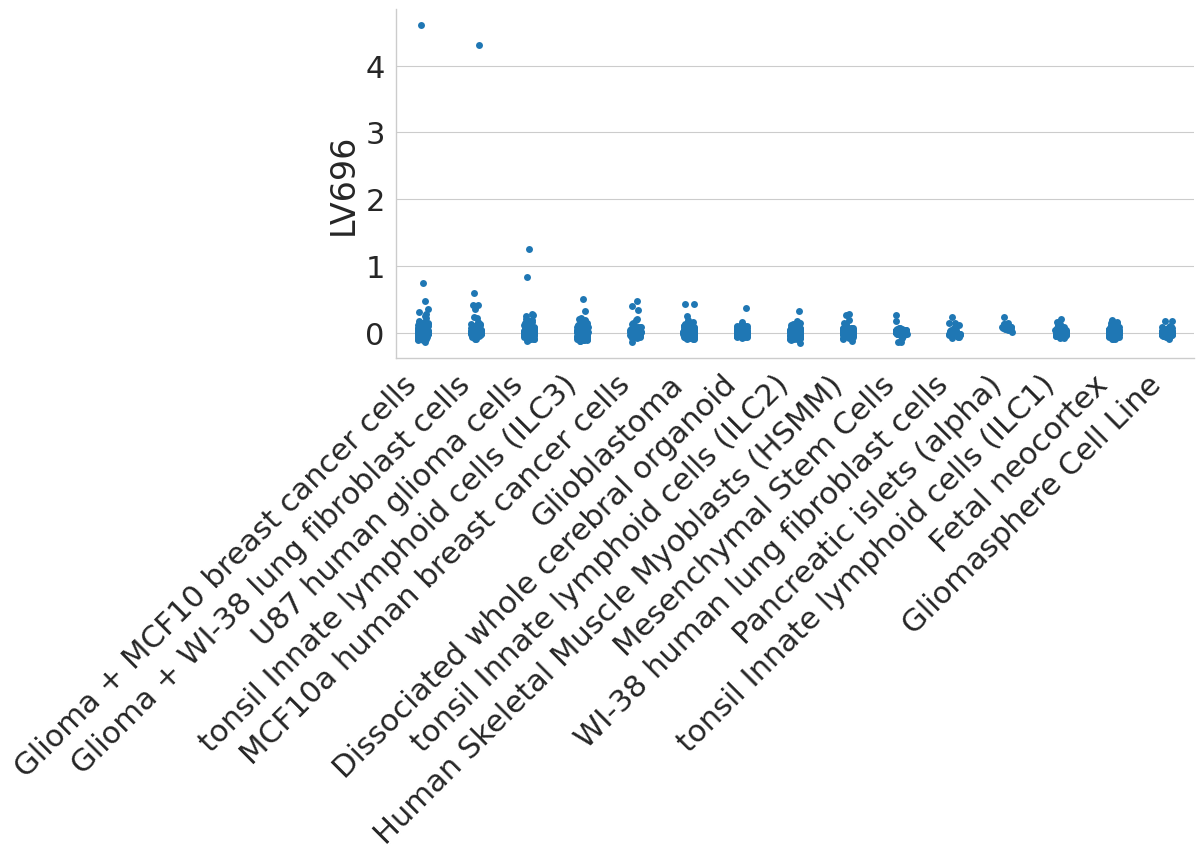

In [48]:
with sns.plotting_context("paper", font_scale=2.5), sns.axes_style("whitegrid"):
    g = sns.catplot(
        data=final_plot_data,
        y=LV_NAME,
        x=SELECTED_ATTRIBUTE,
        order=attr_order,
        kind="strip",
        height=5,
        aspect=2.5,
    )
    plt.xticks(rotation=45, horizontalalignment="right")
    plt.xlabel("")

    # plt.savefig(
    #     OUTPUT_CELL_TYPE_FILEPATH,
    #     bbox_inches="tight",
    #     facecolor="white",
    # )

In [135]:
# with sns.plotting_context("paper", font_scale=2.5), sns.axes_style("whitegrid"):
#     g = sns.catplot(
#         data=final_plot_data,
#         y=LV_NAME,
#         x=SELECTED_ATTRIBUTE,
#         order=attr_order,
#         kind="box",
#         height=5,
#         aspect=2.5,
#     )
#     plt.xticks(rotation=45, horizontalalignment="right")
#     plt.xlabel("")

#     # plt.savefig(
#     #     OUTPUT_CELL_TYPE_FILEPATH,
#     #     bbox_inches="tight",
#     #     facecolor="white",
#     # )

# Debug

In [140]:
# with pd.option_context(
#     "display.max_rows", None, "display.max_columns", None, "display.max_colwidth", None
# ):
#     _tmp = final_plot_data[final_plot_data[SELECTED_ATTRIBUTE].str.contains("(NK)")].sort_values(LV_NAME, ascending=False)
#     display(_tmp.head(20))

In [141]:
# # what is there in these projects?
# _tmp = lv_data.loc[["SRP060416"]].dropna(how="all", axis=1).sort_values(
#     LV_NAME, ascending=False
# )

# display(_tmp.head(60))

In [143]:
# _tmp["facs gating"].value_counts()

# Reduced plot

## Data stats

In [ ]:
plot_data_stats = final_plot_data.describe()[LV_NAME]
display(plot_data_stats)

In [ ]:
plot_data_stats_by_cell_type = (
    final_plot_data.groupby(SELECTED_ATTRIBUTE)
    .describe()[LV_NAME]
    .sort_values("50%", ascending=False)
)
display(plot_data_stats_by_cell_type)

In [ ]:
# keep cell types whose median is larger than the global median
selected_cell_types = plot_data_stats_by_cell_type[
    (plot_data_stats_by_cell_type["50%"] > max(plot_data_stats.loc["50%"], 0.0))
].index
display(selected_cell_types)

In [ ]:
final_plot_data.shape

In [ ]:
final_plot_data = final_plot_data[
    final_plot_data[SELECTED_ATTRIBUTE].isin(selected_cell_types)
]

In [ ]:
final_plot_data.shape

## Set x-axis order

In [ ]:
attr_order = (
    final_plot_data.groupby(SELECTED_ATTRIBUTE)
    .median()
    .sort_values(LV_NAME, ascending=False)
    .index[:N_TOP_ATTRS]
    .tolist()
)

In [ ]:
len(attr_order)

In [ ]:
attr_order[:5]

## Plot

In [ ]:
with sns.plotting_context("paper", font_scale=2.5), sns.axes_style("whitegrid"):
    g = sns.catplot(
        data=final_plot_data,
        y=LV_NAME,
        x=SELECTED_ATTRIBUTE,
        order=attr_order,
        kind="box",
        height=5,
        aspect=2.5,
    )
    plt.xticks(rotation=45, horizontalalignment="right")
    plt.xlabel("")

    # plt.savefig(
    #     OUTPUT_CELL_TYPE_FILEPATH,
    #     bbox_inches="tight",
    #     facecolor="white",
    # )